In [13]:
import numpy as np
from conf_exp6 import *

%pylab inline
from utils import img_utils

import matplotlib.pyplot as plt


def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())

Populating the interactive namespace from numpy and matplotlib


In [22]:
parameter_name = 'bsize'
formula = 'f1'
base_folder = './results/exp8/%s/%s/'%(formula, parameter_name)
rango = [55, 50, 45, 40, 35, 30, 25, 20, 15, 10]

GROUPS=1
FITS=1
RANGO=len(rango)
print rango 

"""
REVISAR EL OTRO EL ORDEN DE LO
GUARDADO

"""


mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')

A = {}

# example: mse1000_g0_f0.npy  
name_tmp1 = base_folder + 'mse_g%d_f%d.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d.npy'
name_tmp3 = base_folder + 'A_g%d_bsize%d.npy'
for group in xrange(GROUPS):
    for fit in xrange(FITS):
        mse[:, fit, group] = np.load(name_tmp1%(group, fit))
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))
        
        if group == 0 and group == fit :
            for i in xrange(RANGO):
                A[i] = np.load(name_tmp3%(group, i)) 

print mse.shape


[55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
(10, 1, 1)


In [4]:
mse.shape

(10, 1, 1)

In [5]:

print rango
mean = mse.mean(axis=2).mean(axis=1)
print mean.shape

[55, 50, 45, 40, 35, 30, 25, 20, 15, 10]
(10,)


[55, 50, 45, 40, 35, 30, 25, 20, 15, 10]


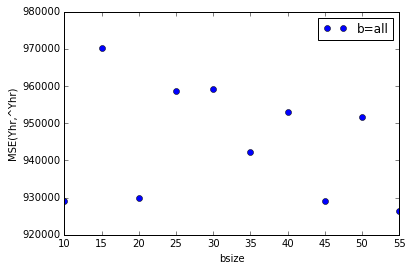

In [6]:
#rango = np.arange(1.627e-15, 2.0, 0.2)
print rango

mean3000 = mse3000.mean(axis=2).mean(axis=1)

#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.plot(rango, mean1000, 'o', label='b=1000')
#plt.plot(rango, mean2000,'o', label='b=2000')
plt.plot(rango, mean,'o', label='b=all')
plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
#plt.xlim(0, 0.5)

## Para grabar
#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp8/bsize.pdf')

(0, 0) (12, 12, 12, 51)


<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

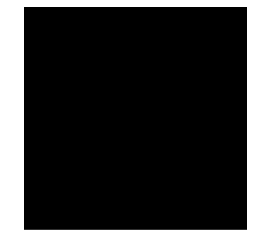

In [25]:
i = 0

print mm(A[i]), A[i].shape
img_utils._is(A[i])